# Kaggle Learn-and-compete `Poker Rule Induction`

## Data Description

You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:

```
S1 “Suit of card #1”
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
C1 “Rank of card #1”
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

...

S5 “Suit of card #5”
C5 “Rank of card #5”
```

Each row in the training set has the accompanying class label for the poker hand it comprises. The hands are omitted from the test set and must be predicted by participants. Hands are classified into the following ordinal categories:


```
0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
```
Note that the Straight flush and Royal flush hands are not representative of
the true domain because they have been over-sampled. The straight flush
is 14.43 times more likely to occur in the training set, while the royal flush is 129.82 times more likely.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#### Read data

In [2]:
test_data = pd.read_csv('./test.csv', delimiter=',')
test_data

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6
5,6,1,4,3,10,2,11,2,6,1,7
6,7,1,10,3,8,1,4,3,11,3,9
7,8,2,11,3,8,1,1,1,11,2,3
8,9,3,4,1,1,1,3,3,5,3,6
9,10,3,12,2,1,1,3,1,2,3,10


In [3]:
train_dataset = pd.read_csv('train.csv', delimiter=',')

In [4]:
data = train_dataset[['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5']]
labels = train_dataset[['hand']]

In [5]:
def one_hot_encode(data):
    summed = pd.DataFrame()
    for i in range(1, 6):
        summed = pd.concat([summed, data['S' + str(i)].astype(str) + data['C' + str(i)].astype(str)], axis=1)
    summed.columns=['card_1', 'card_2', 'card_3', 'card_4', 'card_5']
    encoded = pd.DataFrame()
    for col in summed.columns:
        encoded = pd.concat([encoded, pd.get_dummies(summed[col], prefix=col)], axis=1)
    return encoded

In [6]:
data_encoded = one_hot_encode(data)
data_encoded.shape

(25010, 260)

In [7]:
labels_vect = tf.keras.utils.to_categorical(labels, num_classes=10)

In [8]:
labels_vect

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

#### Encode cards

In [9]:
def card_encode(s, c):
    cards=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
    suits="♥♦♣♠"
    return cards[c - 1] + suits[s - 1]

def hand_encode(hand):
    return ', '.join(map(lambda x: card_encode(hand[x*2], hand[x*2+1]),range(5)))

print(hand_encode([4,9,2,1,2,2,4,7,2,8]))
print(hand_encode([2,9,2,4,3,6,1,9,4,9]))

9♠, A♦, 2♦, 7♠, 8♦
9♦, 4♦, 6♣, 9♥, 9♠


### Solutions

1. Neural network
2. Random forest

Ousiders:
 - Genetic algorithm
 - Decision tree

### Neural Network

In [10]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(260,)))
model.add(keras.layers.Dense(64, activation='relu'))
# Add another:
model.add(keras.layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(data_encoded), np.array(labels_vect), epochs=300, batch_size=32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/300
25010/25010 [==============================]25010/25010 [==============================] - 2s 68us/step - loss: 1.3598 - acc: 0.4808

Epoch 2/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 50us/step - loss: 0.9921 - acc: 0.4969

Epoch 3/300
25010/25010 [==============================]25010/25010 [==============================] - 2s 60us/step - loss: 0.9837 - acc: 0.5008

Epoch 4/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 56us/step - loss: 0.9799 - acc: 0.5022

Epoch 5/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 50us/step - loss: 0.9767 - acc: 0.5052

Epoch 6/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 51us/step - loss: 

25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.5620 - acc: 0.7895

Epoch 52/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.5515 - acc: 0.7961

Epoch 53/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.5432 - acc: 0.7972

Epoch 54/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.5341 - acc: 0.8019

Epoch 55/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 45us/step - loss: 0.5250 - acc: 0.8066

Epoch 56/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 47us/step - loss: 0.5154 - acc: 0.8122

Epoch 57/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 45us/step - loss: 0.5075

25010/25010 [==============================]25010/25010 [==============================] - 1s 41us/step - loss: 0.1829 - acc: 0.9499

Epoch 106/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 42us/step - loss: 0.1790 - acc: 0.9499

Epoch 107/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.1751 - acc: 0.9504

Epoch 108/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.1698 - acc: 0.9524

Epoch 109/300
25010/25010 [==============================]25010/25010 [==============================] - 2s 65us/step - loss: 0.1660 - acc: 0.9546

Epoch 110/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 48us/step - loss: 0.1623 - acc: 0.9549

Epoch 111/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 

25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.0408 - acc: 0.9915

Epoch 159/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.0407 - acc: 0.9921

Epoch 160/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 55us/step - loss: 0.0398 - acc: 0.9916

Epoch 161/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.0373 - acc: 0.9926

Epoch 162/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 51us/step - loss: 0.0362 - acc: 0.9926

Epoch 163/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 58us/step - loss: 0.0351 - acc: 0.9931

Epoch 164/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 

25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.0096 - acc: 0.9984

Epoch 213/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.0078 - acc: 0.9989

Epoch 214/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 45us/step - loss: 0.0104 - acc: 0.998425010 [===========================>..] - ETA: 0s - loss: 0.0105 - acc: 0.99

Epoch 215/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 47us/step - loss: 0.0086 - acc: 0.9987

Epoch 216/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.0082 - acc: 0.9990

Epoch 217/300
25010/25010 [==============================]25010/25010 [==============================] - 2s 67us/step - loss: 0.0097 - acc: 0.9985

Epoch 218/300
25010/25010 [========================

25010/25010 [==============================]25010/25010 [==============================] - 2s 64us/step - loss: 0.0052 - acc: 0.9992

Epoch 265/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.0021 - acc: 0.9999

Epoch 266/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.0015 - acc: 1.0000

Epoch 267/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.0015 - acc: 1.0000

Epoch 268/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.0054 - acc: 0.9989

Epoch 269/300
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.0073 - acc: 0.998225010 [=====================>........] - ETA: 0s - loss: 0.0081 - acc: 0. - ETA: 0s - loss: 0.0074 - acc: 0.998

Epoch 270/300
2

In [11]:
test_data_encoded = one_hot_encode(test_data)
test_data_encoded.shape

(1000000, 260)

Q♥, 5♣, 7♦, 4♣, 4♦
[  9.99999881e-01   9.68209690e-08   9.02187741e-32   0.00000000e+00
   2.87359091e-12   2.57765814e-13   8.21421071e-37   0.00000000e+00
   5.49627842e-22   2.48438707e-16]


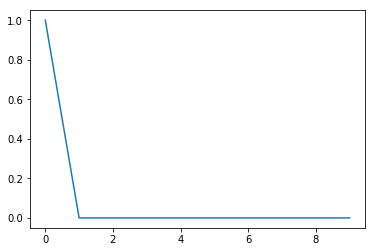

In [12]:
test_hand = test_data_encoded[101:102]
print(hand_encode(np.array(test_data[101:102])[0][1:]))
prediction = model.predict(np.array(test_data_encoded[0:1]))
print(prediction[0])
plt.plot(prediction[0])

### Random Forest